# Binary Classification (Dogs vs. Cats)

In [1]:
from tensorflow import keras

## Get Dataset Ready

In [2]:
import os, pathlib, shutil

base_dir = pathlib.Path("data/dogs-vs-cats")
kaggle_base_dir = pathlib.Path("data/kaggle")


## Split the Dataset to `train`, `valid`, and `test`.

In [10]:
# Let's define the train, valid, and test datasets
# 0 ~ 5999 for training: 6000 samples
# 6000 ~ 7999 for validation: 2000 samples
# 8000 ~ 9999 for testing: 2000 samples

# Create directories for the datasets


NUM_TRAIN = 6000
NUM_VALID = 2000
NUM_TEST = 2000

categories = ["cat", "dog"]
kaggle_data_directory = kaggle_base_dir / "train"
train_dir = base_dir / "train"
valid_dir = base_dir / "valid"
test_dir = base_dir / "test"

if not train_dir.exists():
    for category in categories:
        temp_train_dir = base_dir / "train" / f'{category}'
        temp_valid_dir = base_dir / "valid" / f'{category}'
        temp_test_dir = base_dir / "test" / f'{category}'

        os.makedirs(temp_train_dir)
        os.makedirs(temp_valid_dir)
        os.makedirs(temp_test_dir)



In [17]:
# Copy images to respective directories
num_samples = [ NUM_TRAIN, NUM_VALID, NUM_TEST ]
dirs = [ train_dir, valid_dir, test_dir ]

for dir in dirs:
    for category in categories:
        category_dir = dir / category
        # We assume the directory is created already
        start_index = 0
        if "valid" in str(dir):
            start_index = NUM_TRAIN
        elif "test" in str(dir):
            start_index = NUM_TRAIN + NUM_VALID

        for i in range(num_samples[dirs.index(dir)]):
            src = kaggle_data_directory / f"{category}.{start_index + i}.jpg"
            dst = category_dir / f"{category}.{start_index + i}.jpg"
            print(f"Copying from {src} to {dst}")
            shutil.copyfile(src, dst)



Copying from data\kaggle\train\cat.0.jpg to data\dogs-vs-cats\train\cat\cat.0.jpg
Copying from data\kaggle\train\cat.1.jpg to data\dogs-vs-cats\train\cat\cat.1.jpg
Copying from data\kaggle\train\cat.2.jpg to data\dogs-vs-cats\train\cat\cat.2.jpg
Copying from data\kaggle\train\cat.3.jpg to data\dogs-vs-cats\train\cat\cat.3.jpg
Copying from data\kaggle\train\cat.4.jpg to data\dogs-vs-cats\train\cat\cat.4.jpg
Copying from data\kaggle\train\cat.5.jpg to data\dogs-vs-cats\train\cat\cat.5.jpg
Copying from data\kaggle\train\cat.6.jpg to data\dogs-vs-cats\train\cat\cat.6.jpg
Copying from data\kaggle\train\cat.7.jpg to data\dogs-vs-cats\train\cat\cat.7.jpg
Copying from data\kaggle\train\cat.8.jpg to data\dogs-vs-cats\train\cat\cat.8.jpg
Copying from data\kaggle\train\cat.9.jpg to data\dogs-vs-cats\train\cat\cat.9.jpg
Copying from data\kaggle\train\cat.10.jpg to data\dogs-vs-cats\train\cat\cat.10.jpg
Copying from data\kaggle\train\cat.11.jpg to data\dogs-vs-cats\train\cat\cat.11.jpg
Copying from

## Create Dataset Objects

In [18]:
train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32,
)
valid_ds = keras.utils.image_dataset_from_directory(
    valid_dir,
    image_size=(180, 180),
    batch_size=32,
)
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32,
)


Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


Data batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


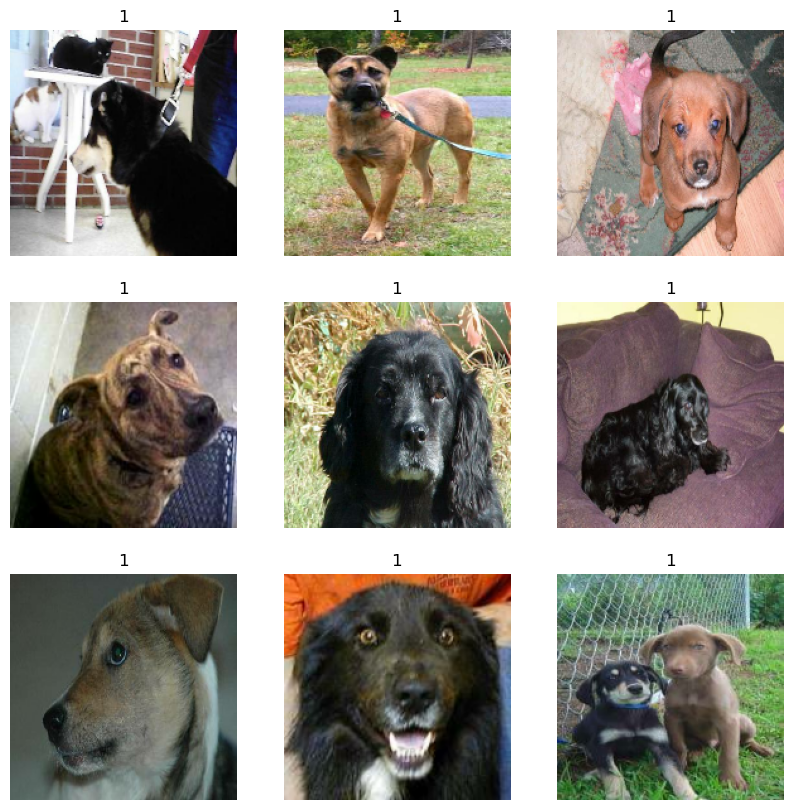

[1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0]


In [19]:
import matplotlib.pyplot as plt

for data_batch, labels in train_ds:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels.shape)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()
    print(labels.numpy())
    break

## Create a simple CNN model to train this Dogs vs. Cats

In [20]:
from tensorflow import keras


In [21]:
input_shape = (180, 180, 3)
num_classes = 2
model = keras.Sequential(
    [
        keras.layers.Rescaling(1./255, input_shape=input_shape),
        keras.layers.Conv2D(32, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax'),
    ]
)

c:\Users\Sobhi\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/dogs-vs-cats/cnn_model_epoch{epoch:02d}_valacc{val_accuracy:.2f}.h5',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        mode='max',
        restore_best_weights=True,
    ),
    keras.callbacks.TensorBoard(log_dir='logs/dogs-vs-cats')
]


In [24]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=50,
    callbacks=callbacks
)
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy:.2f}') 

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5420 - loss: 0.8410

375/375 ━━━━━━━━━━━━━━━━━━━━ 165s 435ms/step - accuracy: 0.5876 - loss: 0.6965 - val_accuracy: 0.6798 - val_loss: 0.5922
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.6962 - loss: 0.5842

375/375 ━━━━━━━━━━━━━━━━━━━━ 164s 436ms/step - accuracy: 0.7107 - loss: 0.5622 - val_accuracy: 0.7190 - val_loss: 0.5480
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.7412 - loss: 0.5117

375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 379ms/step - accuracy: 0.7525 - loss: 0.4993 - val_accuracy: 0.7228 - val_loss: 0.5638
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7934 - loss: 0.4344

375/375 ━━━━━━━━━━━━━━━━━━━━ 151s 402ms/step - accuracy: 0.8027 - loss: 0.4181 - val_accuracy: 0.7517 - val_loss: 0.5356
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 378ms/step - accuracy: 0.8500 - loss: 0.3402 - val_accuracy: 0.7375 - val_loss: 0.6213
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.8951 - loss: 0.2516

375/375 ━━━━━━━━━━━━━━━━━━━━ 153s 409ms/step - accuracy: 0.9047 - loss: 0.2316 - val_accuracy: 0.7580 - val_loss: 0.7338
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 392ms/step - accuracy: 0.9415 - loss: 0.1443 - val_accuracy: 0.7548 - val_loss: 0.8725
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 409ms/step - accuracy: 0.9646 - loss: 0.0919 - val_accuracy: 0.7513 - val_loss: 1.1047
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 174s 463ms/step - accuracy: 0.9721 - loss: 0.0760 - val_accuracy: 0.7513 - val_loss: 1.4092
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.7715 - loss: 0.6628
Test accuracy: 0.77


## DogsCats class

Let's implement DogsCats class based on the previous experiments.

In [26]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os, shutil


class DogsCatsConfig:
    def __init__(self):
        self.base_dir = pathlib.Path("data/dogs-vs-cats")
        self.kaggle_base_dir = pathlib.Path("data/kaggle")
        self.num_train = 6000
        self.num_valid = 2000
        self.num_test = 2000
        self.categories = ["cat", "dog"]
        self.kaggle_data_directory = self.kaggle_base_dir / "train"
        self.train_dir = self.base_dir / "train"
        self.valid_dir = self.base_dir / "valid"
        self.test_dir = self.base_dir / "test"
        self.image_shape = (180, 180, 3)

        self.epochs = 20
        self.batch_size = 32


class DogsCats:
    def __init__(self, config: DogsCatsConfig):
        self.config = config
        self._prepare_datasets()
        self.train_ds = None
        self.valid_ds = None
        self.test_ds = None
        self.model = None

    def _make_datasets_directories(self):
        for category in self.config.categories:
            temp_train_dir = self.config.base_dir / "train" / f'{category}'
            temp_valid_dir = self.config.base_dir / "valid" / f'{category}'
            temp_test_dir = self.config.base_dir / "test" / f'{category}'

            os.makedirs(temp_train_dir, exist_ok=True)
            os.makedirs(temp_valid_dir, exist_ok=True)
            os.makedirs(temp_test_dir, exist_ok=True)

    def _copy_datasets(self):
        num_samples = [ self.config.num_train, self.config.num_valid, self.config.num_test ]
        dirs = [ self.config.train_dir, self.config.valid_dir, self.config.test_dir ]

        for dir in dirs:
            for category in self.config.categories:
                category_dir = dir / category
                start_index = 0
                if "valid" in str(dir):
                    start_index = self.config.num_train
                elif "test" in str(dir):
                    start_index = self.config.num_train + self.config.num_valid

                for i in range(num_samples[dirs.index(dir)]):
                    src = self.config.kaggle_data_directory / f"{category}.{start_index + i}.jpg"
                    dst = category_dir / f"{category}.{start_index + i}.jpg"
                    shutil.copyfile(src, dst)


    def _prepare_datasets(self):
        self._make_datasets_directories()
        self._copy_datasets()


    def make_datasets(self):
        self.train_ds = keras.utils.image_dataset_from_directory(
            self.config.train_dir,
            image_size=self.config.image_shape[:2],
            batch_size=self.config.batch_size,
        )
        self.valid_ds = keras.utils.image_dataset_from_directory(
            self.config.valid_dir,
            image_size=self.config.image_shape[:2],
            batch_size=self.config.batch_size,
        )
        self.test_ds = keras.utils.image_dataset_from_directory(
            self.config.test_dir,
            image_size=self.config.image_shape[:2],
            batch_size=self.config.batch_size,
        )


    def build_model(self):
        self.model = keras.Sequential(
            [
                keras.layers.InputLayer(shape=self.config.image_shape),
                keras.layers.Rescaling(1./255),
                keras.layers.Conv2D(32, 3, activation='relu'),
                keras.layers.MaxPooling2D(),
                keras.layers.Conv2D(64, 3, activation='relu'),
                keras.layers.MaxPooling2D(),
                keras.layers.Conv2D(128, 3, activation='relu'),
                keras.layers.MaxPooling2D(),
                keras.layers.Flatten(),
                keras.layers.Dense(128, activation='relu'),
                keras.layers.Dense(len(self.config.categories), activation='softmax'),
            ]
        )

        self.model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
        )
        self.model.summary()

    def train_model(self, model_name: str, enforce: bool = False):
        if enforce is False and os.path.exists(f'models/dogs-vs-cats/{model_name}_final.keras'):
            print("Loading existing model...")
            self.load_model(f'models/dogs-vs-cats/{model_name}_final.keras')
            return
            
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                filepath=f'models/dogs-vs-cats/{model_name}_epoch{{epoch:02d}}_valacc{{val_accuracy:.2f}}.keras',
                save_best_only=True,
                monitor='val_accuracy',
                mode='max',
            ),
            keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=3,
                mode='max',
                restore_best_weights=True,
            ),
            keras.callbacks.TensorBoard(log_dir=f'logs/dogs-vs-cats/{model_name}')
        ]

        history = self.model.fit(
            self.train_ds,
            validation_data=self.valid_ds,
            epochs=self.config.epochs,
            callbacks=callbacks
        )

        self.model.save(f'models/dogs-vs-cats/{model_name}_final.keras')

    def load_model(self, model_path: str):
        self.model = keras.models.load_model(model_path)
        #self.model.summary()
    
    def evaluate_model(self):
        results = self.model.evaluate(self.test_ds)
        print(f'Test Loss: {results[0]:.4f}')
        print(f'Test Accuracy: {results[1]:.4f}')

    def predict(self, image_file: str):
        image = keras.preprocessing.image.load_img(image_file)

        image = keras.preprocessing.image.img_to_array(image)
        image = keras.preprocessing.image.smart_resize(image, self.config.image_shape[:2])

        image = np.expand_dims(image, axis=0)  # Add batch dimension

        predictions = self.model.predict(image)
        predicted_class = np.argmax(predictions, axis=1)[0]

        return self.config.categories[predicted_class]
    


In [27]:
# Test the DogsCats class
config = DogsCatsConfig()
dogs_cats = DogsCats(config)
dogs_cats.make_datasets()
dogs_cats.build_model()
dogs_cats.train_model("jaerock-kwon")



Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,234 (25.36 MB)

 Trainable params: 6,647,234 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 171s 452ms/step - accuracy: 0.5873 - loss: 0.6726 - val_accuracy: 0.6780 - val_loss: 0.5960
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 171s 456ms/step - accuracy: 0.7126 - loss: 0.5593 - val_accuracy: 0.6765 - val_loss: 0.5968
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 148s 394ms/step - accuracy: 0.7809 - loss: 0.4556 - val_accuracy: 0.7770 - val_loss: 0.4934
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 172s 460ms/step - accuracy: 0.8302 - loss: 0.3726 - val_accuracy: 0.7763 - val_loss: 0.5283
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 148s 394ms/step - accuracy: 0.8923 - loss: 0.2595 - val_accuracy: 0.7847 - val_loss: 0.5899
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 160s 428ms/step - accuracy: 0.9388 - loss: 0.1599 - val_accuracy: 0.7753 - val_loss: 0.7964
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 157s 420ms/step - accuracy: 0.9643 - loss: 0.0949 - val_accuracy: 0.7745 - val_loss: 0.9909
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 175s 467ms/step - accuracy: 0.9783 -

In [28]:
dogs_cats.evaluate_model()


125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 194ms/step - accuracy: 0.7928 - loss: 0.5246
Test Loss: 0.5246
Test Accuracy: 0.7928


Let's test the trained model with some test images!

In [29]:
import random

# Get three random numbers from 8000 to 9999
random_numbers = random.sample(range(8000, 9999), 3)
print(random_numbers)

for num in random_numbers:
    dogs_cats.predict(f"data/dogs-vs-cats/test/cat/cat.{num}.jpg")

[9455, 9830, 8432]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [30]:
# Get three random numbers from 8000 to 9999
random_numbers = random.sample(range(8000, 9999), 3)
print(random_numbers)

for num in random_numbers:
    dogs_cats.predict(f"data/dogs-vs-cats/test/dog/dog.{num}.jpg")

[8819, 9662, 9428]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Let's show the prediction results with the input images in 3x3 figures.

In [31]:
import random
import matplotlib.pyplot as plt

# Get nine random numbers from 8000 to 9999 (test set ranges)
random_numbers = random.sample(range(8000, 9999), 9)
print(random_numbers)

[8256, 9907, 9451, 9792, 9419, 9157, 9112, 8839, 8739]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


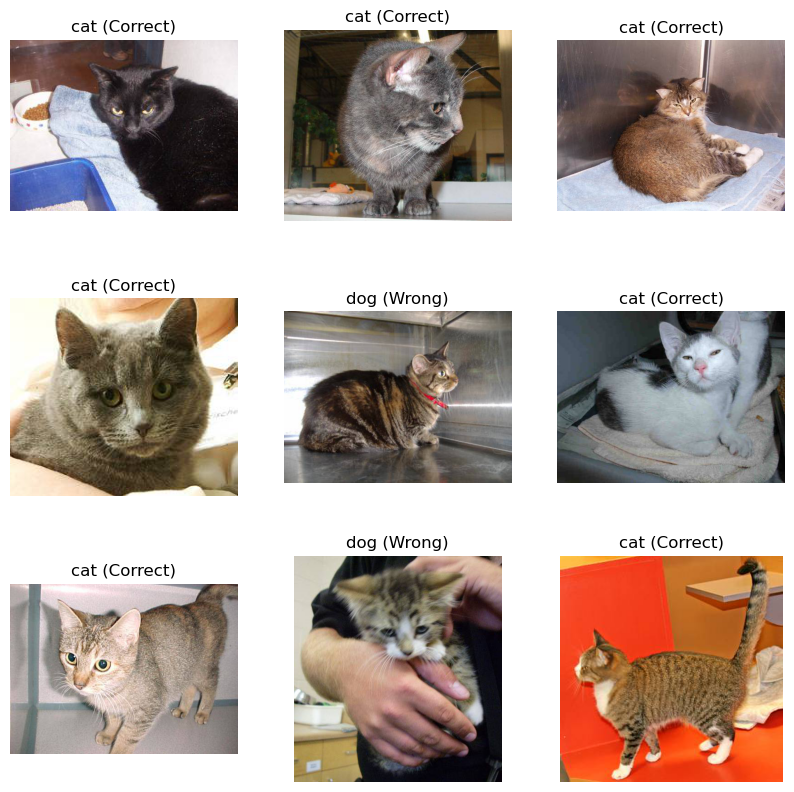

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


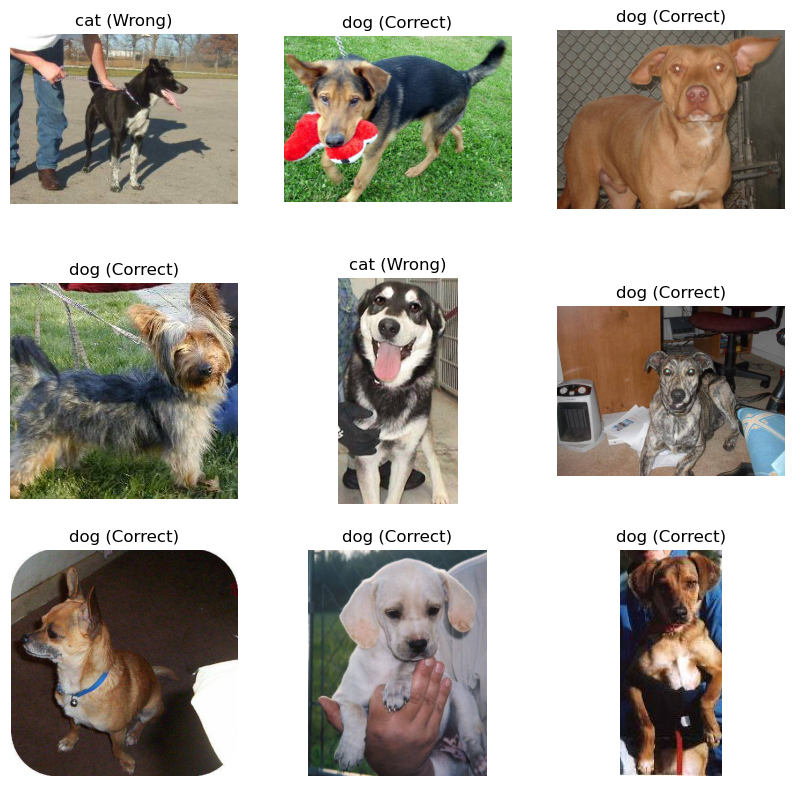

In [32]:
categories = ["cat", "dog"]

for category in categories:
    plt.figure(figsize=(10, 10))
    for i, num in enumerate(random_numbers):
        ax = plt.subplot(3, 3, i + 1)
        image_path = f"data/dogs-vs-cats/test/{category}/{category}.{num}.jpg"

        image = keras.preprocessing.image.load_img(image_path)
        image_array = keras.preprocessing.image.img_to_array(image).astype("uint8")

        prediction = dogs_cats.predict(image_path)
        if prediction == category:
            prediction += " (Correct)"
        else:
            prediction += " (Wrong)"

        plt.imshow(image_array)
        plt.title(prediction)
        plt.axis("off")
    plt.show()


## Base CNN (dogs_cats.py)

In [33]:
from dogs_cats import DogsCatsConfig, DogsCats

# Create configuration
cfg = DogsCatsConfig()

# Create base CNN object (this also prepares dataset folders)
dc = DogsCats(cfg)

# Build TensorFlow datasets
dc.make_datasets()

# Build CNN
dc.build_network()

# Show model summary
dc.model.summary()

# Train and save
history_base = dc.train_model("model.sobhi-zeidan-base-final.keras")


Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,234 (25.36 MB)

 Trainable params: 6,647,234 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 150s 398ms/step - accuracy: 0.5792 - loss: 0.6865 - val_accuracy: 0.6242 - val_loss: 0.6643
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 151s 402ms/step - accuracy: 0.6696 - loss: 0.6152 - val_accuracy: 0.6892 - val_loss: 0.5991
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 160s 428ms/step - accuracy: 0.7358 - loss: 0.5227 - val_accuracy: 0.7163 - val_loss: 0.6053
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 162s 432ms/step - accuracy: 0.8036 - loss: 0.4200 - val_accuracy: 0.7318 - val_loss: 0.6387
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 173s 462ms/step - accuracy: 0.8724 - loss: 0.2943 - val_accuracy: 0.7200 - val_loss: 0.8077
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 177s 473ms/step - accuracy: 0.9308 - loss: 0.1691 - val_accuracy: 0.7145 - val_loss: 1.1970
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 176s 469ms/step - accuracy: 0.9603 - loss: 0.1088 - val_accuracy: 0.7065 - val_loss: 1.3927
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 180s 481ms/step - accuracy: 0.9753 -

## CNN with Data Augmentation (dogs_cats_aug.py)

In [34]:
from dogs_cats_aug import DogsCatsAug

# Create augmented CNN
dc_aug = DogsCatsAug(cfg)

dc_aug.make_datasets()
dc_aug.build_network()

dc_aug.model.summary()

history_aug = dc_aug.train_model("model.sobhi-zeidan-aug-final.keras")


Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,234 (25.36 MB)

 Trainable params: 6,647,234 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 169s 447ms/step - accuracy: 0.5400 - loss: 0.6957 - val_accuracy: 0.5683 - val_loss: 0.6784
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 179s 477ms/step - accuracy: 0.5801 - loss: 0.6733 - val_accuracy: 0.6055 - val_loss: 0.6571
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 183s 487ms/step - accuracy: 0.6258 - loss: 0.6488 - val_accuracy: 0.6580 - val_loss: 0.6257
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 186s 496ms/step - accuracy: 0.6764 - loss: 0.6076 - val_accuracy: 0.6702 - val_loss: 0.6233
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 177s 472ms/step - accuracy: 0.6896 - loss: 0.5834 - val_accuracy: 0.7130 - val_loss: 0.5624
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 186s 497ms/step - accuracy: 0.7157 - loss: 0.5562 - val_accuracy: 0.7300 - val_loss: 0.5320
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 174s 465ms/step - accuracy: 0.7278 - loss: 0.5367 - val_accuracy: 0.7448 - val_loss: 0.5129
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 170s 454ms/step - accuracy: 0.7384 -

## Pretrained VGG16 Feature Extractor (dogs_cats_pre.py)
#### Optimization (`DogsCatsPre`)

For the pretrained VGG16 feature extractor, I adjusted the configuration in `DogsCatsConfig` to make training more practical on my machine while still demonstrating transfer learning correctly.

Instead of using the full original split (6000 train, 2000 validation, 2000 test per class), I reduced the dataset size and the computational load by overriding the configuration before creating the `DogsCatsPre` object:

```python
cfg.num_train = 2000
cfg.num_valid = 1000
cfg.num_test  = 1000
cfg.epochs    = 5
cfg.image_shape = (128, 128, 3)




In [41]:
from dogs_cats import DogsCatsConfig
from dogs_cats_pre import DogsCatsPre

# Create config
cfg = DogsCatsConfig()

# ✅ Override config values for faster training
cfg.num_train = 2000
cfg.num_valid = 1000
cfg.num_test  = 1000
cfg.epochs    = 5
cfg.image_shape = (128, 128, 3)


# Create pretrained model
dc_pre = DogsCatsPre(cfg)

# Build datasets
dc_pre.make_datasets()

# Build VGG16 model
dc_pre.build_network()

# Show network
dc_pre.model.summary()

# Train
history_pre = dc_pre.train_model("model.sobhi-zeidan-pre-final.keras")


Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_15         │ (None, 128, 128)  │          0 │ input_layer_16[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_16         │ (None, 128, 128)  │          0 │ input_layer_16[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_17         │ (None, 128, 128)  │          0 │ input_layer_16[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_5 (Stack)     │ (None, 128, 128,  │          0 │ get_item_15[0][0… │
│                     │ 3)                │            │ get_item_16[0][0… │
│                     │                   │            │ get_item_17[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 128, 128,  │          0 │ stack_5[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 4, 4, 512) │ 14,714,688 │ add_5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 256)       │    131,328 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 2)         │        514 │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,846,530 (56.64 MB)

 Trainable params: 131,842 (515.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 625s 2s/step - accuracy: 0.9056 - loss: 0.5208 - val_accuracy: 0.9457 - val_loss: 0.2568
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 795s 2s/step - accuracy: 0.9545 - loss: 0.1840 - val_accuracy: 0.9500 - val_loss: 0.2151
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 703s 2s/step - accuracy: 0.9672 - loss: 0.1158 - val_accuracy: 0.9528 - val_loss: 0.2067
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 730s 2s/step - accuracy: 0.9763 - loss: 0.0772 - val_accuracy: 0.9540 - val_loss: 0.1839
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - accuracy: 0.9835 - loss: 0.0524 - val_accuracy: 0.9528 - val_loss: 0.2123
125/125 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9498 - loss: 0.2296
Test accuracy: 0.9497500061988831


## Fine-Tuned VGG16 (dogs_cats_fine.py)
## Optimization (`DogsCatsFine`)

Fine-tuning the final convolutional block of VGG16 requires additional training time. To ensure that fine-tuning completes efficiently while preserving the behavior of transfer learning, only a subset of the training, validation, and test datasets is used during this stage.

### Applied Change:
```python
dc_fine.train_dataset = dc_fine.train_dataset.take(100)
dc_fine.valid_dataset = dc_fine.valid_dataset.take(50)
dc_fine.test_dataset  = dc_fine.test_dataset.take(50)


In [52]:
import importlib
import dogs_cats_fine
importlib.reload(dogs_cats_fine)

from dogs_cats import DogsCatsConfig
from dogs_cats_fine import DogsCatsFine

In [53]:
# 1) Create config and make fine-tuning shorter
cfg = DogsCatsConfig()
cfg.epochs = 5  # fewer epochs for baseline + fine-tune

# 2) Create fine-tuning model
dc_fine = DogsCatsFine(cfg)

# 3) Build datasets and network
dc_fine.make_datasets()
dc_fine.build_network()

# 4) limit how much data is used per epoch
#    This keeps disk data intact but makes training much faster.
dc_fine.train_dataset = dc_fine.train_dataset.take(100)   # ~100 batches for training
dc_fine.valid_dataset = dc_fine.valid_dataset.take(50)    # ~50 batches for validation
dc_fine.test_dataset  = dc_fine.test_dataset.take(50)     # ~50 batches for test eval

# 5) Train baseline with frozen VGG16 features
dc_fine.train_model("model.sobhi-zeidan-pre-baseline.keras")

# 6) Now fine-tune block5 (DogsCatsFine.fine_tune() will unfreeze block5 and fit again)
history_fine = dc_fine.fine_tune("model.sobhi-zeidan-fine-final.keras")


Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.8641 - loss: 0.6708 - val_accuracy: 0.9488 - val_loss: 0.1980
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.9606 - loss: 0.1342 - val_accuracy: 0.9600 - val_loss: 0.1724
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.9762 - loss: 0.0747 - val_accuracy: 0.9625 - val_loss: 0.1552
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9862 - loss: 0.0492 - val_accuracy: 0.9669 - val_loss: 0.1491
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.9925 - loss: 0.0352 - val_accuracy: 0.9644 - val_loss: 0.1486
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9569 - loss: 0.1486
Test accuracy: 0.9568750262260437
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 359s 4s/step - accuracy: 0.9859 - loss: 0.0365 - val_accuracy: 0.9700 - val_loss: 0.1410


## Test Prediction

In [47]:
import os
import random

# Use whichever trained model you want:
# dc_pre, dc_fine, dc_aug, or dc
model = dc_pre   # <-- change this if you want to test a different model

# Base test directory
test_base = "data/dogs-vs-cats/test"

# Collect all image paths with labels
all_images = []

for label in ["cat", "dog"]:
    folder = os.path.join(test_base, label)
    for fname in os.listdir(folder):
        full_path = os.path.join(folder, fname)
        all_images.append((full_path, label))

# Pick 10 random images
random_images = random.sample(all_images, 10)

# Predict and display results
for img_path, true_label in random_images:
    prediction = model.predict(img_path)
    print(f"Image: {img_path}")
    print(f"True Label: {true_label} | Predicted: {prediction}")
    print("-" * 60)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Image: data/dogs-vs-cats/test\dog\dog.9469.jpg
True Label: dog | Predicted: dog
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image: data/dogs-vs-cats/test\cat\cat.8664.jpg
True Label: cat | Predicted: cat
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image: data/dogs-vs-cats/test\cat\cat.8293.jpg
True Label: cat | Predicted: cat
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image: data/dogs-vs-cats/test\cat\cat.8279.jpg
True Label: cat | Predicted: cat
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Image: data/dogs-vs-cats/test\dog\dog.8127.jpg
True Label: dog | Predicted: cat
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Image: data/dogs-vs-cats/test\dog\dog.9247.jpg
True Label: dog | P